### Diabetes Detection using Machine Learning


####  Data Analysis & Visualization


In [35]:
# import necessary libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# reading the diabetes dataset
df = pd.read_csv("diabetes.csv")

In [37]:
# printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
# printing the shape of the dataset
df.shape

(768, 9)

In [39]:
# feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
# statistical information
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
# checking number of people with and without diabetes
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [42]:
def diagnostic_plots(df, variable,target):

    plt.figure(figsize=(15,6))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')
    
    # boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 3, 3)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

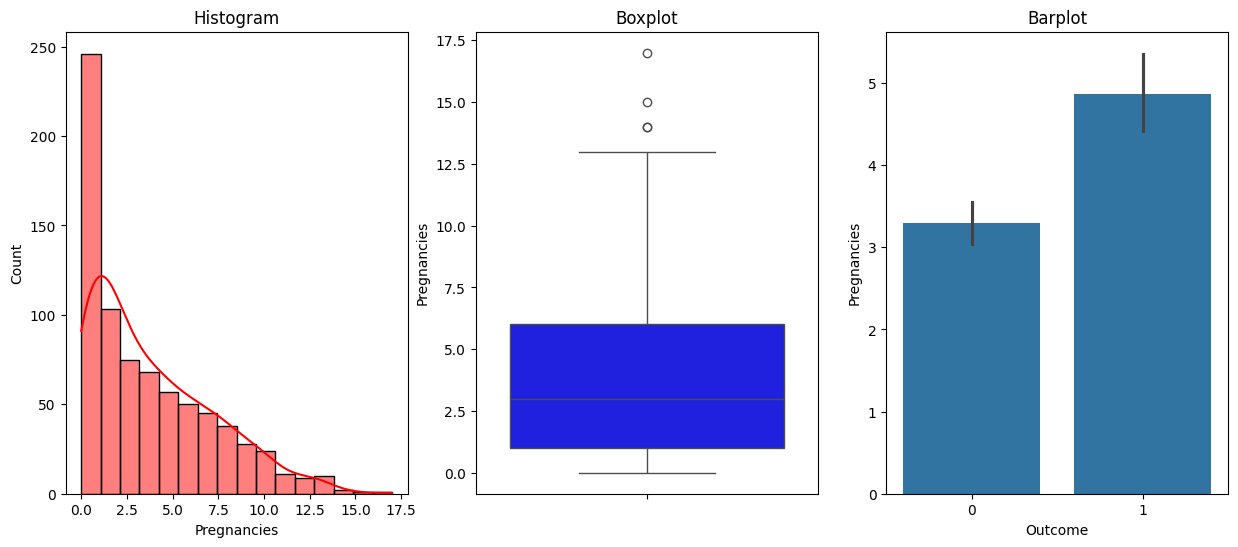

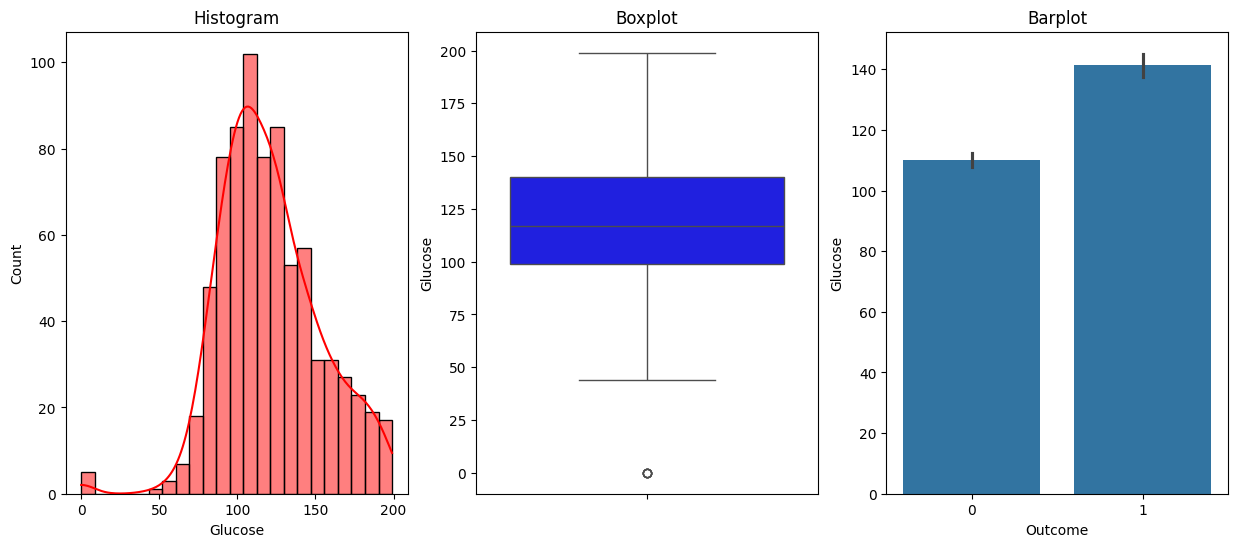

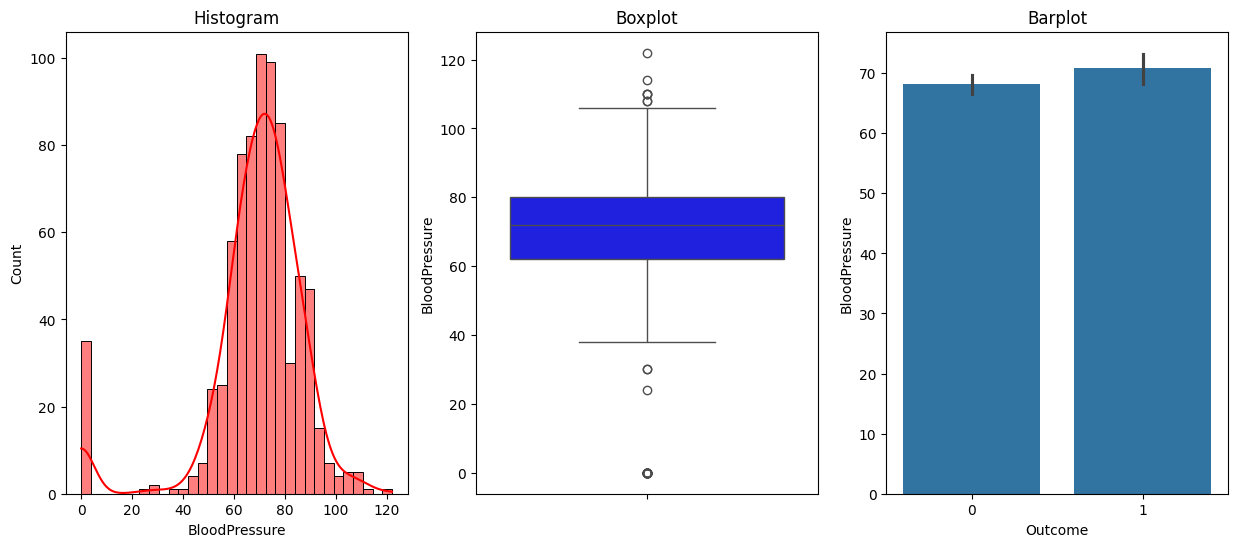

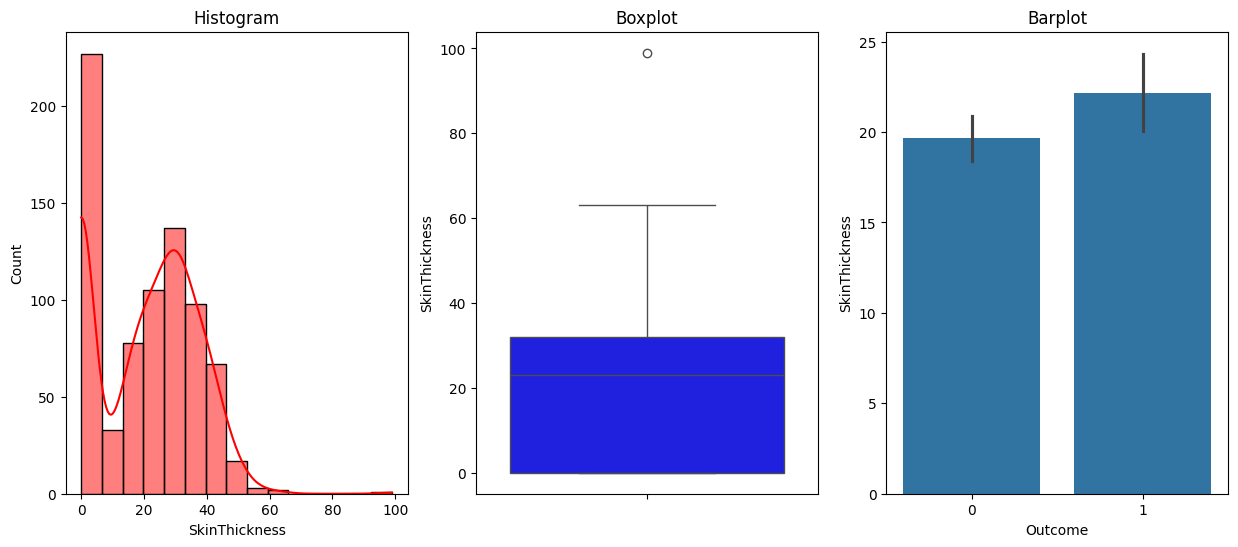

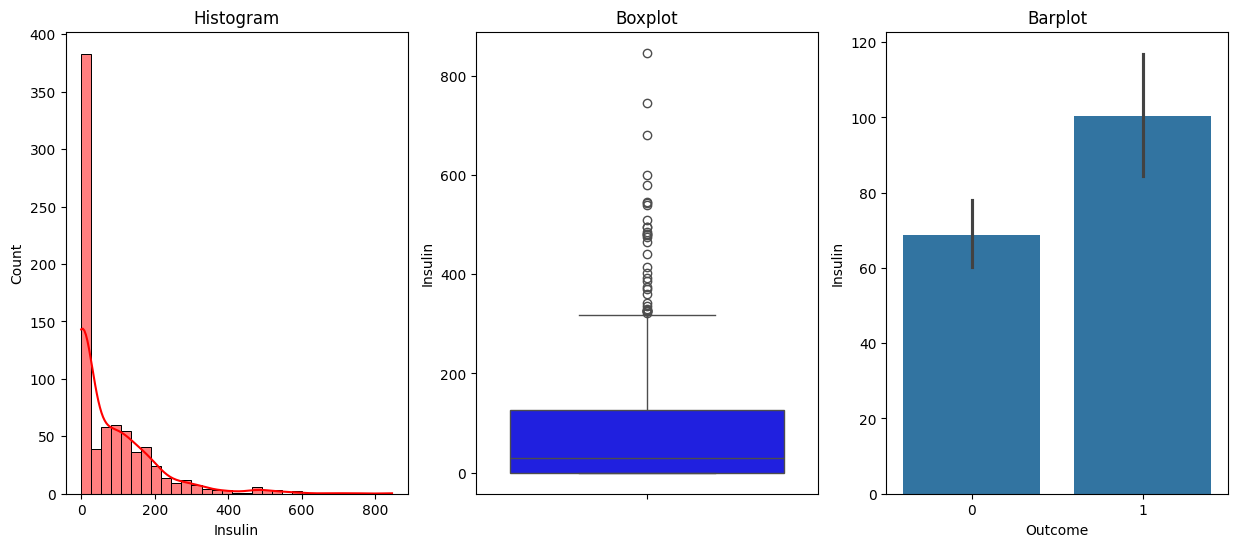

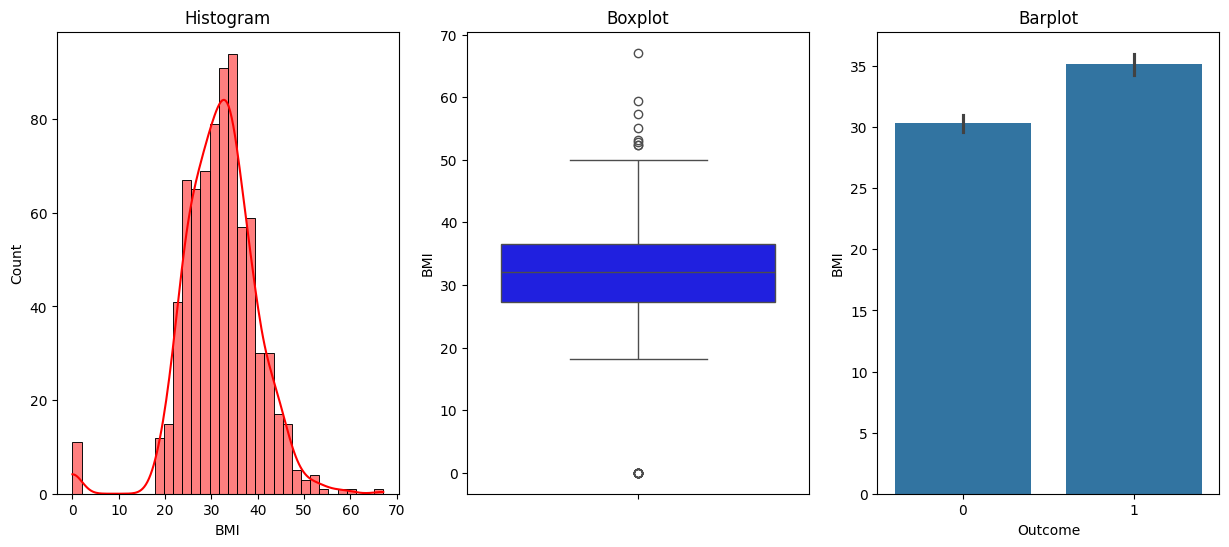

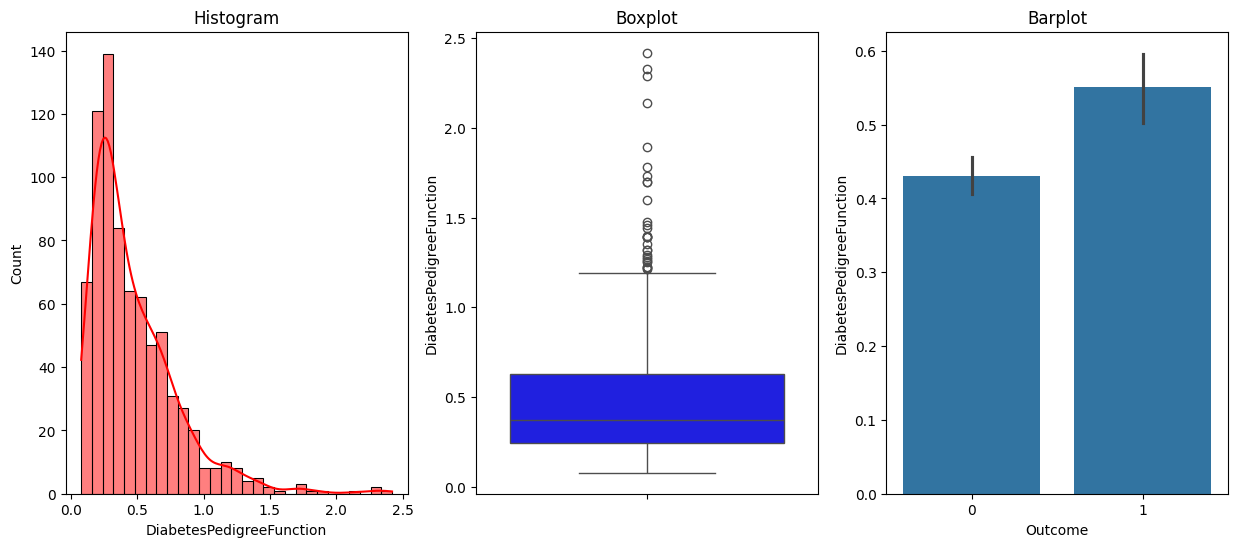

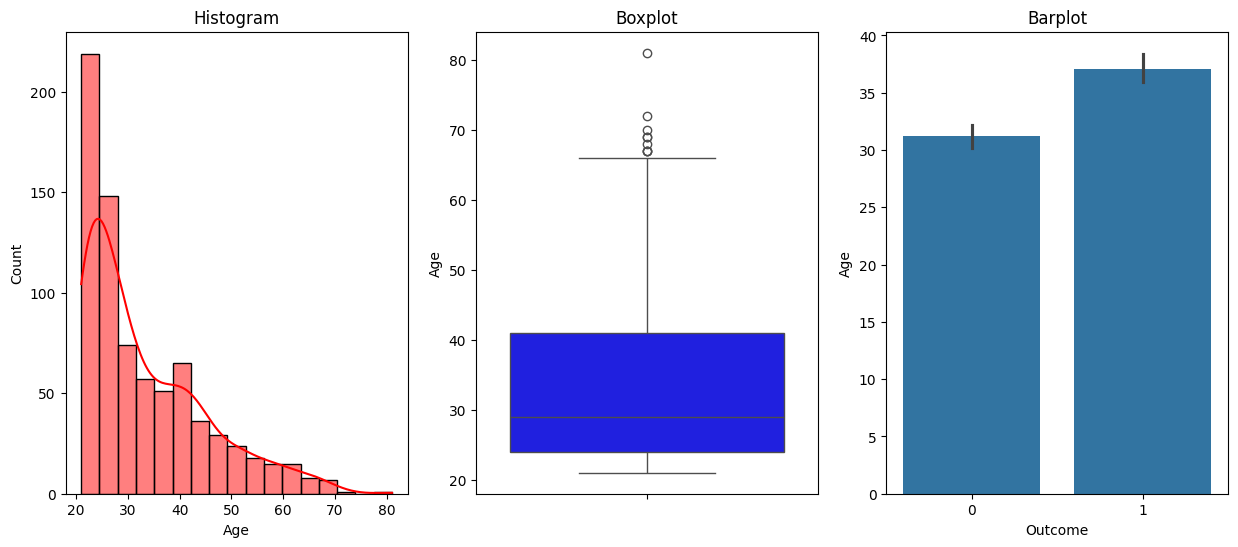

In [43]:
for col in df.columns:
    if col != 'Outcome':
        diagnostic_plots(df, col, 'Outcome')


> The Box plots here indicate that there are outliers in the data. We will remove them later.

#### Data Preprocessing


#####  Handling Missing Values


In [44]:
# in the dataset some of the features contains 0 which is not possible, so we replace them with NaN
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[
    ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
].replace(0, np.NaN)

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [46]:
# checking the null values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

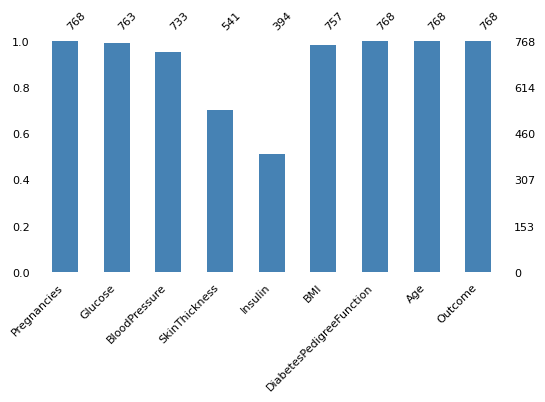

In [47]:
# visualizing the null values using missingno library
msno.bar(df, figsize=(6, 3), fontsize=8, color="steelblue")

In [48]:
# we use central tendency to fill the missing values using median based on outcome


def replace_median(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, "Outcome"]].groupby(["Outcome"])[[var]].median().reset_index()
    return temp


columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    replace_median(i)
    df.loc[(df["Outcome"] == 0) & (df[i].isnull()), i] = replace_median(i)[i][0]
    df.loc[(df["Outcome"] == 1) & (df[i].isnull()), i] = replace_median(i)[i][1]

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [50]:
# outlier detection

def findOutliers(df): 

    for feature in df.drop("Outcome", axis=1).columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)

        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        outliers = df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature]

        print(feature, outliers.shape[0])

findOutliers(df)

Pregnancies 4
Glucose 0
BloodPressure 14
SkinThickness 87
Insulin 51
BMI 8
DiabetesPedigreeFunction 29
Age 9


<Axes: >

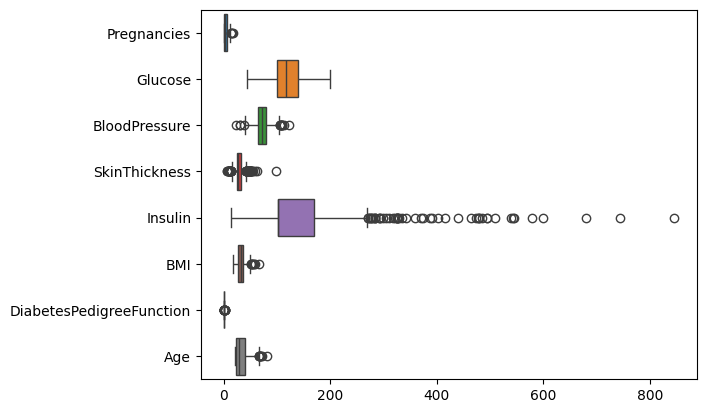

In [51]:
# using boxplot to visualize the outliers

sns.boxplot(data= df.drop('Outcome', axis=1), orient="h")

In [52]:
# deleting the outliers

def deleteOutliers(df):
    for feature in df.drop("Outcome", axis=1).columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)

        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        df = df.loc[(df[feature] > lower_limit) & (df[feature] < upper_limit)]

    return df

df = deleteOutliers(df)

In [53]:
df.shape

(579, 9)

#### Model Preparation


In [54]:
# splitting the dataset into train and test

from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Outcome", axis=1), df["Outcome"], test_size=0.3, random_state=42
)

In [56]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
586,8,143.0,66.0,32.0,169.5,34.9,0.129,41
92,7,81.0,78.0,40.0,48.0,46.7,0.261,42
277,0,104.0,64.0,23.0,116.0,27.8,0.454,23
356,1,125.0,50.0,40.0,167.0,33.3,0.962,28
452,0,91.0,68.0,32.0,210.0,39.9,0.381,25


In [57]:
# scaling the data using StandardScaler

from sklearn.preprocessing import MaxAbsScaler

st =MaxAbsScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [58]:
X_train

array([[0.61538462, 0.72959184, 0.64705882, ..., 0.7457265 , 0.1117851 ,
        0.62121212],
       [0.53846154, 0.41326531, 0.76470588, ..., 0.99786325, 0.22616984,
        0.63636364],
       [0.        , 0.53061224, 0.62745098, ..., 0.59401709, 0.39341421,
        0.34848485],
       ...,
       [0.69230769, 0.84183673, 0.8627451 , ..., 0.64957265, 0.26169844,
        0.74242424],
       [0.15384615, 0.66326531, 0.94117647, ..., 0.48290598, 0.2322357 ,
        0.31818182],
       [0.61538462, 0.42857143, 0.7254902 , ..., 0.81837607, 0.39601386,
        0.59090909]])

In [59]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [60]:
predictions_train = logmodel.predict(X_train)
predictions_test = logmodel.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
# train accuracy
print("Train Accuracy: ", accuracy_score(y_train, predictions_train))

# test accuracy
print("Test Accuracy: ", accuracy_score(y_test, predictions_test))

Train Accuracy:  0.8518518518518519
Test Accuracy:  0.8850574712643678


<Axes: >

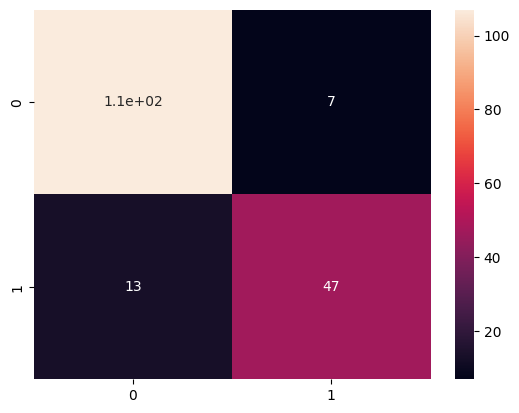

In [63]:
# confusion matrix using sns heatmap
cm = confusion_matrix(y_test, predictions_test)
sns.heatmap(
    cm,
    annot=True
)

In [64]:
# classification report

print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       114
           1       0.87      0.78      0.82        60

    accuracy                           0.89       174
   macro avg       0.88      0.86      0.87       174
weighted avg       0.88      0.89      0.88       174

